Archivos CSV 'ventas.csv' y 'usuarios.csv' creados con éxito.

Datos de Ventas:
   ProductoID  UsuarioID  CantidadVendida  FechaVenta
0        1102         22                3  2023-01-01
1        1435         53                7  2023-01-02
2        1860          2                4  2023-01-03
3        1270         88                9  2023-01-04
4        1106         30                3  2023-01-05

Datos de Usuarios:
   UsuarioID  TiempoEnSitio  PaginasVistas  ProductosVistos
0         44      20.362362             11                8
1          8      46.406284             19                6
2         47      36.636328             17                3
3         35      17.000498              8                1
4         78      28.951755              3                3

Productos más vendidos:
ProductoID
1458    9
1121    9
1270    9
1372    9
1020    7
1130    7
1466    7
1435    7
1099    5
1614    5
1071    5
1860    4
1663    4
1330    4
1106    3
1102    3
1700    3
1214    2


c:\Users\juanito\anaconda3\envs\juanito\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Usuarios agrupados en clusters:
   UsuarioID  Cluster
0         44        1
1          8        0
2         47        2
3         35        1
4         78        2
Época 1, Pérdida: 1.5979
Época 2, Pérdida: 1.5709
Época 3, Pérdida: 1.5441
Época 4, Pérdida: 1.5175
Época 5, Pérdida: 1.4911
Epoch 1/5


c:\Users\juanito\anaconda3\envs\juanito\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5285 - loss: 1.4094
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4313 - loss: 1.5237
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 1.0399
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3799 - loss: 1.4660
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3440 - loss: 1.5828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.4000 - loss: 1.3668

Precisión del modelo con Keras: 0.40


C:\Users\juanito\AppData\Local\Temp\ipykernel_21432\3059801644.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_mas_vendidos.index, y=productos_mas_vendidos.values, palette="viridis")


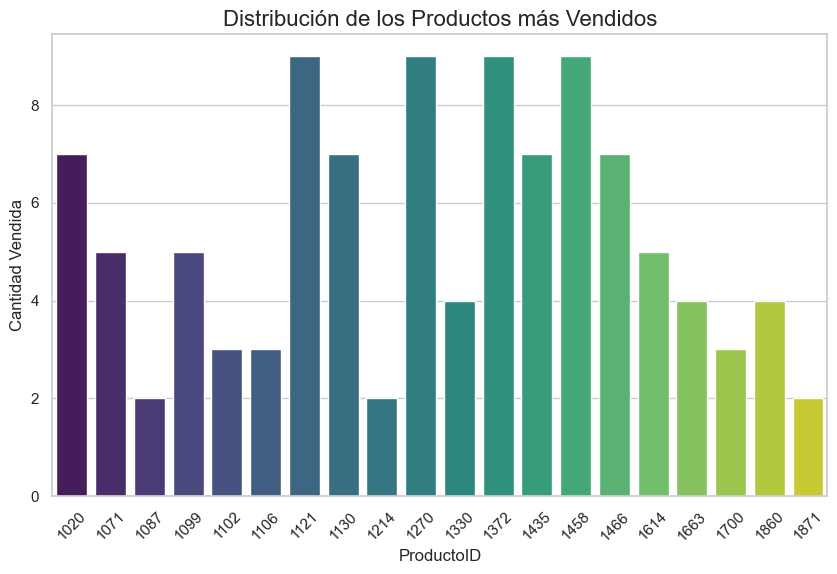

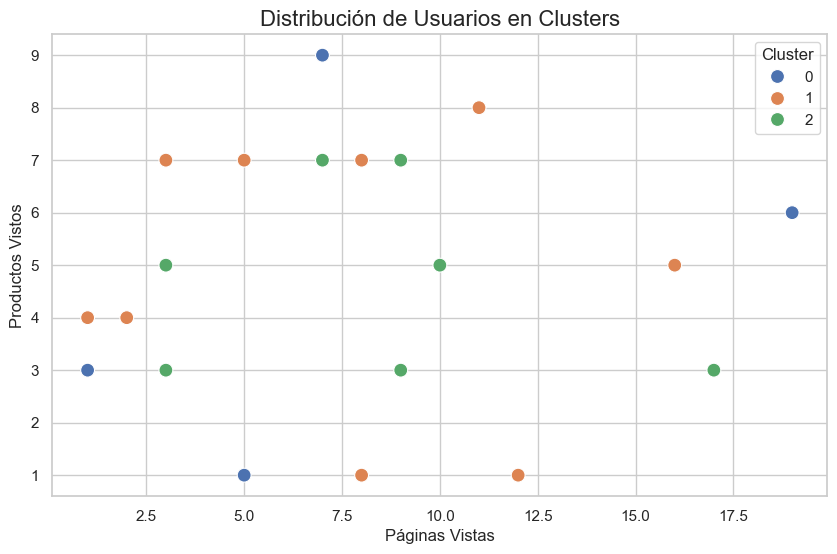

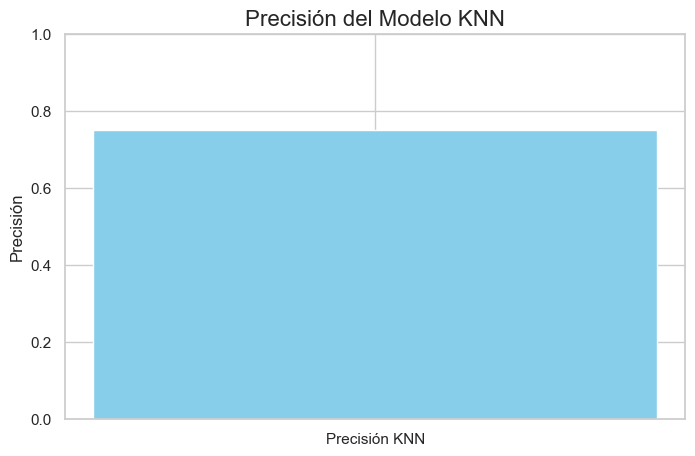

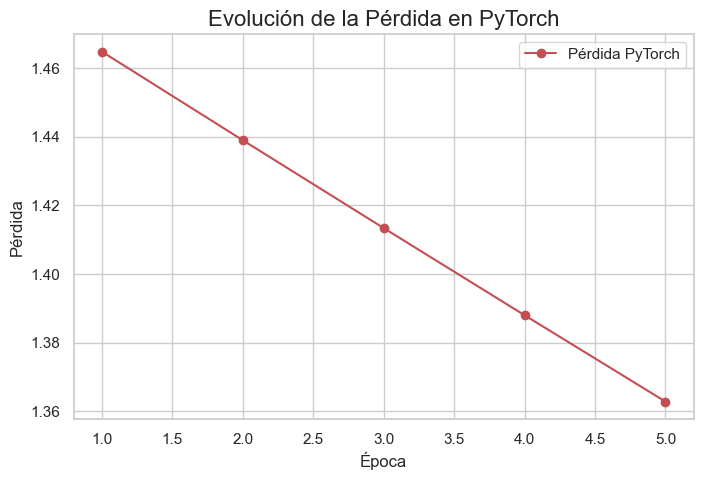

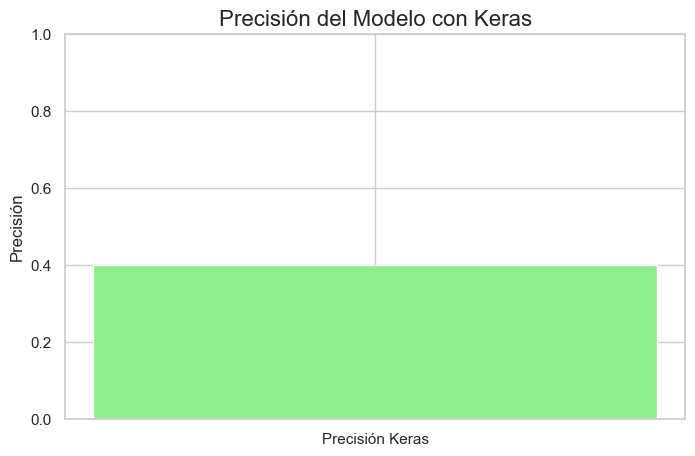

In [2]:
# === BLOQUE 1: CREACIÓN DE ARCHIVOS CSV CON DATOS ALEATORIOS ===

# Importamos las librerías necesarias
import pandas as pd
import numpy as np

# Fijamos una semilla para garantizar la reproducibilidad de los datos
np.random.seed(42)

# Generamos datos aleatorios para las ventas
ventas_data = {
    'ProductoID': np.random.randint(1000, 2000, 20),  # IDs de productos aleatorios
    'UsuarioID': np.random.randint(1, 100, 20),       # IDs de usuarios aleatorios
    'CantidadVendida': np.random.randint(1, 10, 20),  # Cantidad de productos vendidos
    'FechaVenta': pd.date_range(start='2023-01-01', periods=20, freq='D').strftime('%Y-%m-%d')
}

# Creamos un DataFrame para los datos de ventas
ventas_df = pd.DataFrame(ventas_data)

# Guardamos el DataFrame como un archivo CSV
ventas_df.to_csv('ventas.csv', index=False)

# Generamos datos aleatorios para el comportamiento de usuario
usuarios_data = {
    'UsuarioID': np.random.randint(1, 100, 20),        # IDs de usuarios aleatorios
    'TiempoEnSitio': np.random.uniform(1, 50, 20),     # Tiempo en el sitio web (minutos)
    'PaginasVistas': np.random.randint(1, 20, 20),     # Cantidad de páginas vistas
    'ProductosVistos': np.random.randint(1, 10, 20)    # Cantidad de productos vistos
}

# Creamos un DataFrame para los datos de usuarios
usuarios_df = pd.DataFrame(usuarios_data)

# Guardamos el DataFrame como un archivo CSV
usuarios_df.to_csv('usuarios.csv', index=False)

print("Archivos CSV 'ventas.csv' y 'usuarios.csv' creados con éxito.")

# === BLOQUE 2: LECTURA Y ANÁLISIS DE DATOS ===

# Leemos los archivos CSV
ventas = pd.read_csv('ventas.csv')
usuarios = pd.read_csv('usuarios.csv')

# Mostramos los primeros registros de ambos archivos
print("\nDatos de Ventas:")
print(ventas.head())

print("\nDatos de Usuarios:")
print(usuarios.head())

# Análisis de productos más vendidos
productos_mas_vendidos = ventas.groupby('ProductoID')['CantidadVendida'].sum().sort_values(ascending=False)
print("\nProductos más vendidos:")
print(productos_mas_vendidos)

# === BLOQUE 3: MACHINE LEARNING CON SCIKIT-LEARN ===

# Importamos las librerías de Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Añadimos una columna de simulación de compra (0: no compra, 1: compra)
usuarios['Compra'] = np.random.randint(0, 2, usuarios.shape[0])

# Separamos las características (X) y la variable objetivo (y)
X = usuarios[['TiempoEnSitio', 'PaginasVistas', 'ProductosVistos']]
y = usuarios['Compra']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modelo KNN (Clasificación) ---
# Creamos y entrenamos un modelo de KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizamos predicciones
y_pred = knn.predict(X_test)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo KNN: {accuracy:.2f}")

# --- Modelo K-Means (Clustering) ---
# Creamos y entrenamos un modelo de K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Asignamos los usuarios a clusters
usuarios['Cluster'] = kmeans.labels_

print("\nUsuarios agrupados en clusters:")
print(usuarios[['UsuarioID', 'Cluster']].head())

# === BLOQUE 4: MACHINE LEARNING CON PYTORCH ===

# Importamos las librerías de PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Definimos una red neuronal simple con PyTorch
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(3, 10)  # 3 entradas (tiempo, páginas, productos), 10 neuronas ocultas
        self.fc2 = nn.Linear(10, 1)  # 1 salida (predicción de compra)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Creamos el modelo de la red neuronal
modelo_pytorch = RedNeuronal()

# Definimos el optimizador y la función de pérdida
criterio = nn.BCELoss()  # Binary Cross-Entropy Loss para clasificación binaria
optimizador = optim.Adam(modelo_pytorch.parameters(), lr=0.001)

# Convertimos los datos de entrada y las etiquetas a tensores
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Entrenamos el modelo de PyTorch durante 5 épocas
for epoch in range(5):
    # Forward pass
    salida = modelo_pytorch(X_tensor)
    perdida = criterio(salida, y_tensor)

    # Backward pass y optimización
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()

    print(f"Época {epoch+1}, Pérdida: {perdida.item():.4f}")

# === BLOQUE 5: DEEP LEARNING CON TENSORFLOW Y KERAS ===

# Importamos TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creamos una red neuronal profunda con Keras
modelo_keras = Sequential([
    Dense(10, input_shape=(3,), activation='relu'),  # Capa oculta con 10 neuronas
    Dense(1, activation='sigmoid')                  # Capa de salida para clasificación binaria
])

# Compilamos el modelo
modelo_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo con los datos de entrada
modelo_keras.fit(X, y, epochs=5, batch_size=4)

# Evaluamos el modelo
perdida, precision = modelo_keras.evaluate(X, y)
print(f"\nPrecisión del modelo con Keras: {precision:.2f}")

#extra
# === BLOQUE EXTRA: VISUALIZACIÓN DE RESULTADOS ===

# Importamos las librerías necesarias para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el estilo de los gráficos
sns.set(style="whitegrid")

# --- 1. Distribución de los productos más vendidos ---
plt.figure(figsize=(10, 6))
sns.barplot(x=productos_mas_vendidos.index, y=productos_mas_vendidos.values, palette="viridis")
plt.title('Distribución de los Productos más Vendidos', fontsize=16)
plt.xlabel('ProductoID', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# --- 2. Gráfico de dispersión de usuarios agrupados en clusters ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PaginasVistas', y='ProductosVistos', hue='Cluster', data=usuarios, palette="deep", s=100)
plt.title('Distribución de Usuarios en Clusters', fontsize=16)
plt.xlabel('Páginas Vistas', fontsize=12)
plt.ylabel('Productos Vistos', fontsize=12)
plt.show()

# --- 3. Precisión del modelo KNN en gráfico de barras ---
plt.figure(figsize=(8, 5))
plt.bar(['Precisión KNN'], [accuracy], color='skyblue')
plt.title('Precisión del Modelo KNN', fontsize=16)
plt.ylabel('Precisión', fontsize=12)
plt.ylim(0, 1)
plt.show()

# --- 4. Pérdida del modelo PyTorch durante el entrenamiento ---
# Almacenamos la pérdida del entrenamiento en PyTorch para cada época (modificar el bloque de entrenamiento)
perdidas_pytorch = []

# Modifica el bucle de entrenamiento en el bloque de PyTorch para guardar la pérdida
for epoch in range(5):
    salida = modelo_pytorch(X_tensor)
    perdida = criterio(salida, y_tensor)
    optimizador.zero_grad()
    perdida.backward()
    optimizador.step()
    perdidas_pytorch.append(perdida.item())  # Almacenamos la pérdida

# Graficamos la pérdida del modelo PyTorch
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), perdidas_pytorch, marker='o', color='r', label='Pérdida PyTorch')
plt.title('Evolución de la Pérdida en PyTorch', fontsize=16)
plt.xlabel('Época', fontsize=12)
plt.ylabel('Pérdida', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Precisión del modelo Keras ---
# Ya tenemos el valor de precisión almacenado, lo graficamos en barras
plt.figure(figsize=(8, 5))
plt.bar(['Precisión Keras'], [precision], color='lightgreen')
plt.title('Precisión del Modelo con Keras', fontsize=16)
plt.ylabel('Precisión', fontsize=12)
plt.ylim(0, 1)
plt.show()
